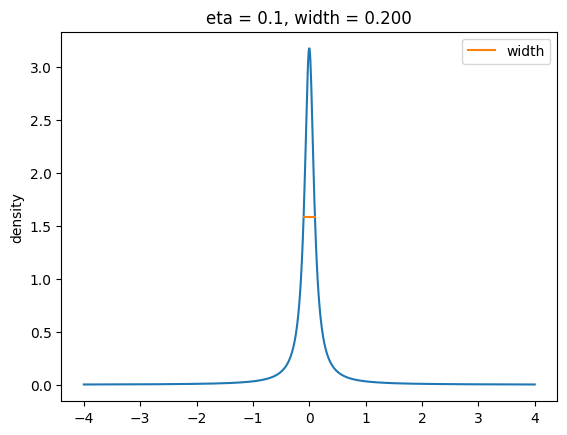

In [35]:
import numpy as np
import matplotlib.pyplot as plt

def Lorentzian(x_range, v_list, eta=0.1):
    density = np.zeros(len(x_range))
    for i, x in enumerate(x_range):
        for v in v_list:
            density[i] += (eta / (eta**2 + (x-v)**2))
        density[i] /= np.pi
        
    max_val = np.max(density)
    max_idx = np.max(np.where(np.abs(density - max_val) < 1e-6)[0])
    
    half_val = max_val / 2
    for i in range(100):
        tol = 1e-6 * 10**i
        half_idx = np.where(np.abs(density - half_val) < tol)[0]
        if len(half_idx) > 1: break
    
    width_idx = [np.min(half_idx[np.where(half_idx > max_idx)]),
                 np.max(half_idx[np.where(half_idx < max_idx)])]
    width = np.array([(x_range[i], half_val) for i in width_idx])
    return density, width, eta

X = np.linspace(-4, 4, 1000)
V = [0]
L, w, eta = Lorentzian(X, V, eta=0.1)

fig, ax = plt.subplots()
ax.plot(X, L)
ax.plot(w[:, 0], w[:, 1], label='width')
ax.set_title('eta = %.1f, width = %.3f' % (eta, w[0, 0] - w[1, 0]))
ax.set_ylabel('density')
ax.legend()
plt.show()

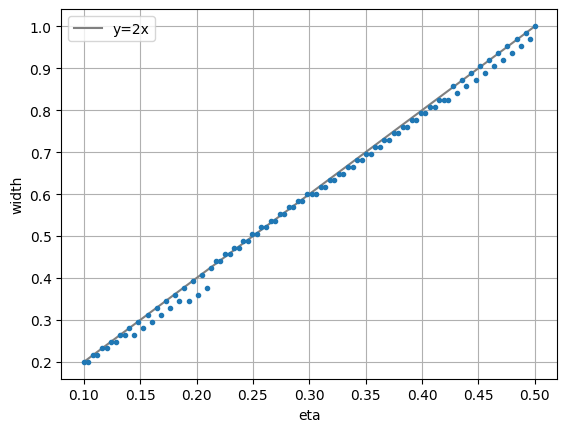

In [36]:
X = np.linspace(-4, 4, 1000)
V = [0]

eta_list = np.linspace(0.1, 0.5, 100)
width_list = []
for eta in eta_list:
    L, w, _ = Lorentzian(X, V, eta=eta)
    width_list.append(w[0, 0] - w[1, 0])
    
fig, ax = plt.subplots()
ax.plot(eta_list, 2*eta_list, label='y=2x', color='gray')
ax.plot(eta_list, width_list, '.')
ax.set_xlabel('eta')
ax.set_ylabel('width')
ax.grid()
ax.legend()
plt.show()

2.0202020202020203


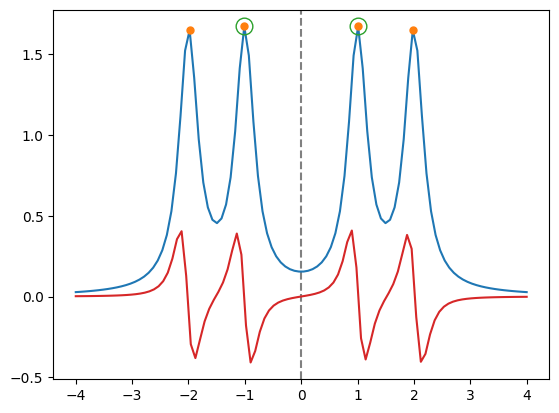

In [149]:
X = np.linspace(-4, 4, 100)
V = [-2, -1, 1, 2]
L, w, eta = Lorentzian(X, V, eta=0.2)

dL = np.diff(L)
dL_bool = dL > 0
peak_idx = [i+1 for i in range(len(dL_bool)-1) if dL_bool[i] and not dL_bool[i+1]]

X0_idx = np.min(np.where(X > 0))
X0_pad = 0
peak_pos = np.min([i for i in peak_idx if i > (X0_idx + X0_pad)])
peak_neg = np.max([i for i in peak_idx if i < (X0_idx - X0_pad)])
gap = X[peak_pos] - X[peak_neg]
print(gap)

fig, ax = plt.subplots()
ax.axvline(0, ls='--', c='grey')
ax.plot(X, L)
ax.plot(X[peak_idx], L[peak_idx], '.', ms=10)
ax.plot([X[peak_pos], X[peak_neg]], [L[peak_pos], L[peak_neg]], 'o', ms=12, mfc='none')
ax.plot(np.linspace(-4, 4, len(dL)), dL)
plt.show()